In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,the new crpf apartments,sector 9,0.75,5814.0,1290.0,Carpet area: 1290 (119.84 sq.m.),3.0,3.0,3,6.0,East,Old Property,NaN,NaN,1290.00,0.0,0.0,0.0,1.0,0.0,0.0,31.0,430.000000
1,house,dlf city plots,sector 26,17.30,38737.0,4466.0,Plot area 502(419.74 sq.m.),6.0,7.0,3+,3.0,North,New Property,NaN,4518.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,124.0,744.333333
2,flat,emaar gurgaon greens,sector 102,1.52,9212.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,7.0,North-West,Relatively New,1650.0,NaN,1022.58,0.0,1.0,0.0,0.0,0.0,2.0,137.0,550.000000
3,house,not applicable,sector 4,0.40,9259.0,432.0,Plot area 432(40.13 sq.m.),1.0,1.0,1,1.0,NaN,Moderately Old,NaN,432.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432.000000
4,flat,bptp terra,sector 37,1.17,8298.0,1410.0,Super Built up area 1410(130.99 sq.m.),2.0,2.0,2,0.0,North-East,Relatively New,1410.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,107.0,705.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  990
agePossession             0
super_built_up_area    1610
built_up_area          1962
carpet_area            1661
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

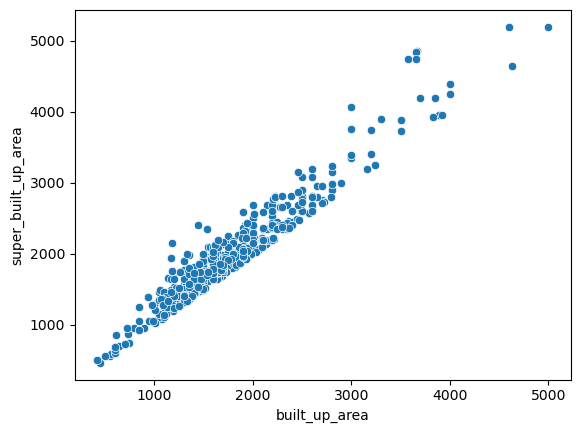

In [7]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

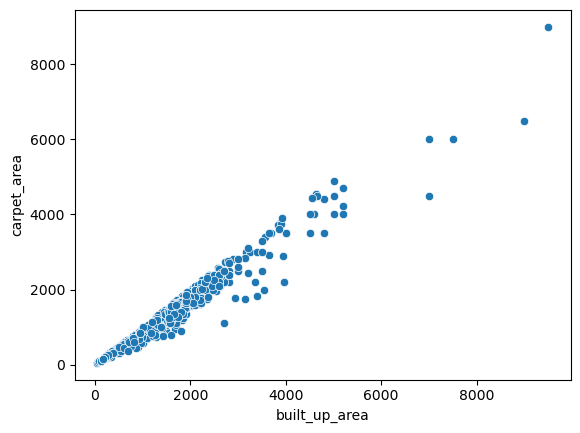

In [10]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [11]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3480    False
3481    False
3482    False
3483    False
3484    False
Length: 3485, dtype: bool

In [12]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [13]:
all_present_df.shape

(531, 24)

In [14]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [15]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [16]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [17]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [18]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,emaar gurgaon greens,sector 102,1.52,9212.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,7.0,North-West,Relatively New,1650.0,NaN,1022.58,0.0,1.0,0.0,0.0,0.0,2.0,137.0,550.000000
9,flat,emaar gurgaon greens,sector 102,1.49,9030.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,10.0,North-East,Relatively New,1650.0,NaN,1022.58,0.0,0.0,0.0,0.0,0.0,2.0,159.0,550.000000
17,flat,vatika city homes,sector 83,1.05,8571.0,1225.0,Super Built up area 1740(161.65 sq.m.)Carpet a...,3.0,3.0,3,8.0,South-East,Moderately Old,1740.0,NaN,1225.00,0.0,0.0,0.0,1.0,0.0,2.0,103.0,408.333333
23,flat,emaar mgf palm hills,sector 77,1.90,9500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3.0,4.0,3+,6.0,South-West,New Property,2000.0,NaN,1218.03,0.0,1.0,0.0,0.0,0.0,2.0,42.0,666.666667
27,flat,afnhb jalvayu vihar,sector 30,1.30,10000.0,1300.0,Super Built up area 1500(139.35 sq.m.)Carpet a...,3.0,3.0,2,2.0,North-East,Old Property,1500.0,NaN,1300.00,0.0,0.0,0.0,0.0,0.0,0.0,19.0,433.333333


In [19]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [20]:
df.update(sbc_df)

In [21]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  990
agePossession             0
super_built_up_area    1610
built_up_area          1541
carpet_area            1661
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [22]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,bptp terra,sector 37,1.17,8298.0,1410.0,Super Built up area 1410(130.99 sq.m.),2.0,2.0,2,0.0,North-East,Relatively New,1410.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,107.0,705.0
8,flat,ireo the grand arch,sector 58,2.20,16000.0,1375.0,Super Built up area 1375(127.74 sq.m.),2.0,2.0,2,6.0,North-East,Relatively New,1375.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,42.0,687.5
13,flat,tata primanti,sector 72,6.50,15294.0,4250.0,Super Built up area 4250(394.84 sq.m.),4.0,4.0,3+,0.0,East,Relatively New,4250.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,67.0,1062.5
15,flat,raheja vanya,sector 99,0.85,6789.0,1252.0,Super Built up area 1252(116.31 sq.m.),2.0,2.0,2,3.0,West,New Property,1252.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,43.0,626.0
24,flat,imperia the esfera,sector 37,0.87,5513.0,1578.0,Super Built up area 1578(146.6 sq.m.),2.0,3.0,3+,9.0,North-East,New Property,1578.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,49.0,789.0


In [24]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [25]:
df.update(sb_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  990
agePossession             0
super_built_up_area    1610
built_up_area           666
carpet_area            1661
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [27]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [28]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,the new crpf apartments,sector 9,0.75,5814.0,1290.0,Carpet area: 1290 (119.84 sq.m.),3.0,3.0,3,6.0,East,Old Property,NaN,NaN,1290.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,430.000000
5,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2.0,2.0,2,3.0,North,Relatively New,NaN,NaN,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,550.000000
10,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
16,flat,brisk lumbini terrace homes,sector 109,1.38,6339.0,2177.0,Carpet area: 2177 (202.25 sq.m.),3.0,3.0,1,4.0,NaN,Moderately Old,NaN,NaN,2177.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,725.666667
18,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2.0,2.0,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,260.000000


In [29]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [30]:
df.update(c_df)

In [31]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  990
agePossession             0
super_built_up_area    1610
built_up_area             0
carpet_area            1661
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

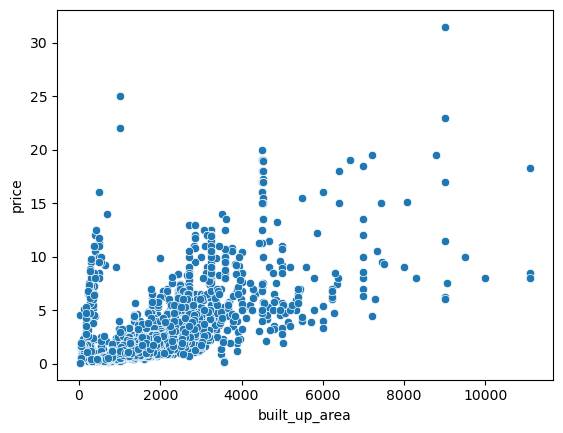

In [33]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [34]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [35]:
anamoly_df.sample(5)

,price,area,built_up_area
1499,2.90,2003.0,1813.0
668,3.50,1722.0,1712.0
32,3.49,1728.0,1728.0
2230,2.90,1975.0,1787.0
1302,9.85,3323.0,418.0


In [36]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

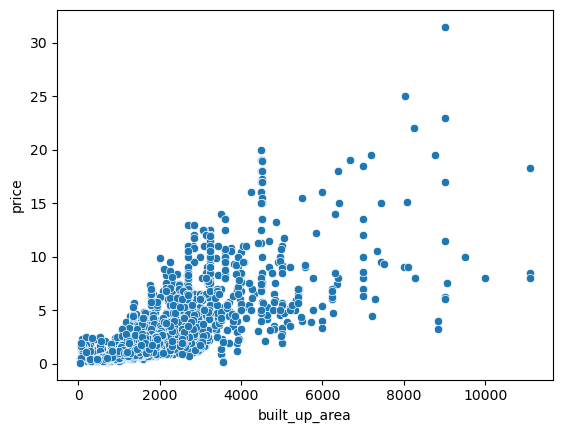

In [39]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [40]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [41]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,the new crpf apartments,sector 9,0.75,5814.0,3.0,3.0,3,6.0,East,Old Property,1433.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0
1,house,dlf city plots,sector 26,17.30,38737.0,6.0,7.0,3+,3.0,North,New Property,4518.0,1.0,1.0,1.0,1.0,0.0,2.0,124.0
2,flat,emaar gurgaon greens,sector 102,1.52,9212.0,3.0,3.0,3,7.0,North-West,Relatively New,1315.0,0.0,1.0,0.0,0.0,0.0,2.0,137.0
3,house,not applicable,sector 4,0.40,9259.0,1.0,1.0,1,1.0,NaN,Moderately Old,432.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,bptp terra,sector 37,1.17,8298.0,2.0,2.0,2,0.0,North-East,Relatively New,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0


In [42]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum            17
facing             990
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

### floorNum

In [43]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
90,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
254,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,2.0,130.0
282,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
515,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
526,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
641,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [44]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [45]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\gudiv\AppData\Local\Temp\ipykernel_1628\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [46]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             990
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [47]:
1011/df.shape[0]

0.29010043041606887

### facing

<Axes: ylabel='count'>

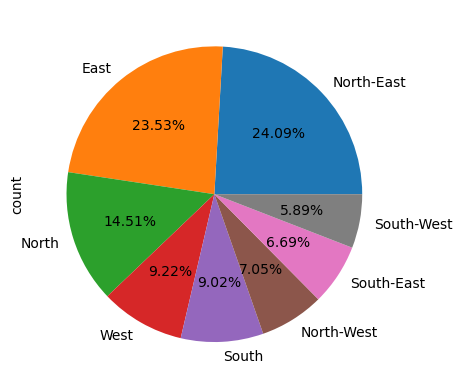

In [48]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [49]:
df.drop(columns=['facing'],inplace=True)

In [50]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1210,flat,vipul lavanya,sector 81,1.28,7175.0,3.0,3.0,3,1.0,Moderately Old,1982.0,0.0,1.0,0.0,1.0,0.0,2.0,49.0
623,house,house number b-34,sector 5,0.80,8889.0,2.0,2.0,1,1.0,Old Property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1395,flat,ansal heights 86,sector 86,0.87,5367.0,2.0,2.0,1,12.0,New Property,1231.0,0.0,0.0,0.0,0.0,1.0,2.0,45.0
1440,flat,4s aradhya homes,sector 67,1.90,8862.0,4.0,4.0,3,3.0,New Property,1991.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0
189,flat,breez global heights,sohna road,0.46,4842.0,2.0,2.0,2,4.0,Relatively New,800.0,0.0,0.0,0.0,0.0,0.0,1.0,93.0


In [55]:
df[df['society'].isna()].index

Index([333], dtype='int64')

In [56]:
df.drop(index=[333],inplace=True)

In [57]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [58]:
df['agePossession'].value_counts()

agePossession
Relatively New        1589
New Property           550
Moderately Old         518
Undefined              287
Old Property           278
Under Construction     262
Name: count, dtype: int64

In [59]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
14,flat,emaar palm gardens,sector 83,1.80,9474.0,3.0,4.0,0,9.0,Undefined,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
20,flat,ireo the corridors,sector 67,1.30,10031.0,2.0,2.0,2,1.0,Undefined,1296.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
21,flat,shapoorji pallonji joyville,sector 102,1.10,12022.0,2.0,2.0,1,7.0,Undefined,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,flat,senate court,sector 62,0.90,14085.0,1.0,1.0,0,0.0,Undefined,639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,flat,ashiana anmol,sector 33,1.10,8627.0,2.0,2.0,2,4.0,Undefined,1275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,house,raj villas,sector 52,8.00,25543.0,6.0,5.0,3+,4.0,Undefined,3132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421,flat,spaze privy,sector 72,1.90,9620.0,3.0,3.0,3,10.0,Undefined,1975.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3447,flat,sare crescent parc,sector 92,1.00,4778.0,4.0,4.0,3,9.0,Undefined,2093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3449,flat,gls arawali homes,sohna road,0.32,6723.0,2.0,1.0,0,0.0,Undefined,476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1699
New Property           586
Moderately Old         552
Old Property           313
Under Construction     280
Undefined               54
Name: count, dtype: int64

In [63]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1708
New Property           587
Moderately Old         555
Old Property           316
Under Construction     280
Undefined               38
Name: count, dtype: int64

In [66]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1710
Moderately Old         591
New Property           587
Old Property           316
Under Construction     280
Name: count, dtype: int64

In [69]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [71]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [70]:
df.shape

(3484, 18)